In [1]:
import numpy as np
import random
import dadi
import pickle
sys.path.append(os.path.join(os.getcwd(), '..')) # this is the ml_dadi dir
import data_manip, plotting

In [2]:
# # Load trained ML models to run bootstrap on
# list_rfr = pickle.load(open('data/list_rfr_exclude_log','rb'))
# list_mlpr = pickle.load(open('data/list_mlpr_exclude_log_lbfgs','rb'))

In [13]:
# Load new trained ML models to run bootstrap on
list_rfr = pickle.load(open('data/new_log/list_rfr_exclude_log','rb'))
list_mlpr = pickle.load(open('data/new_log/list_mlpr_exclude_log_lbfgs','rb'))

In [12]:
# # Generate bootstrap datasets for 1d_2epoch model
# bootstrap_params = []

# while (len(bootstrap_params) < 200):   
#     nu = random.random() * 4 - 2
#     T = random.random() * 1.9 + 0.1
#     # exclude T/nu > 5
#     if T/10**nu <= 5:
#         params = (nu, T)
#         bootstrap_params.append(params)

# # generate a list of theta values to run scaling and add variance
# theta_list = [10000, 1000, 100]
# # Note: needs to match the list used to generate bootstrap data 

# # print some info of testing data
# print('n_samples testing: ', len(bootstrap_params))
# print('Range of testing params:', min(bootstrap_params), 'to', 
#         max(bootstrap_params))
# print('Theta list:', theta_list)

# # designate demographic model, sample size, and extrapolation grid 
# func = dadi.Demographics1D.two_epoch
# ns = [20]
# pts_l = [40, 50, 60]
# logs = [True, False]

# list_bootstrap_dicts = data_manip.generating_data(bootstrap_params, 
#                         theta_list, func, ns, pts_l, logs, bootstrap=True)
# pickle.dump(list_bootstrap_dicts, open('data/bootstrap_data', 'wb'), 2)

n_samples testing:  200
Range of testing params: (-1.2435335736742994, 0.1405458509077315) to (1.9899176675448178, 0.5165054659587799)
Theta list: [10000, 1000, 100]


In [3]:
# Load bootstrap samples: list of 3 dicts for Theta list: [10000, 1000, 100]
# Each dict contain 200 items with the format 
# true_p:[orig_fs,[200 bootstrapped fs from orig_fs]]
list_bootstrap_dicts = pickle.load(open('data/bootstrap_data', 'rb'))

In [14]:
# Choose one trained model from the list to run bootstrap on
rfr_1 = list_rfr[0]
bstr_rfr_1 = data_manip.bootstrap_predictions(rfr_1, list_bootstrap_dicts)
pickle.dump(bstr_rfr_1, 
                open('results/bootstrap/boostrap_pred_rfr_1', 'wb'), 2)

In [20]:
# Choose one trained model from the list to run bootstrap on, for new_log data
rfr_1000 = list_rfr[2]
bstr_rfr_1000 = data_manip.bootstrap_predictions(rfr_1000, list_bootstrap_dicts)
pickle.dump(bstr_rfr_1000, 
            open('results/bootstrap/boostrap_pred_rfr_1000', 'wb'), 2)

In [17]:
# Choose one trained model from the list to run bootstrap on
mlpr_1000 = list_mlpr[2]
bstr_mlpr_1000 = data_manip.bootstrap_predictions(mlpr_1000, list_bootstrap_dicts)
pickle.dump(bstr_mlpr_1000, 
                open('results/bootstrap/boostrap_pred_mlpr_1000', 'wb'), 2)

In [21]:
# Choose one trained model from the list to run bootstrap on
mlpr_1 = list_mlpr[0]
bstr_mlpr_1 = data_manip.bootstrap_predictions(mlpr_1, list_bootstrap_dicts)
pickle.dump(bstr_mlpr_1, 
                open('results/bootstrap/boostrap_pred_mlpr_1', 'wb'), 2)

In [22]:
# Choose one trained model from the list to run bootstrap on
mlpr_10000 = list_mlpr[1]
bstr_mlpr_10000 = data_manip.bootstrap_predictions(mlpr_10000, list_bootstrap_dicts)
pickle.dump(bstr_mlpr_10000, 
                open('results/bootstrap/boostrap_pred_mlpr_10000', 'wb'), 2)

In [ ]:
bstr_rfr_1 = pickle.load(open('results/bootstrap/boostrap_pred_rfr_1', 'rb'))
bstr_rfr_1000 = pickle.load(open('results/bootstrap/boostrap_pred_rfr_1000', 'rb'))
bstr_mlpr_1000 = pickle.load(open('results/bootstrap/boostrap_pred_mlpr_1000', 'rb'))
bstr_mlpr_1 = pickle.load(open('results/bootstrap/boostrap_pred_mlpr_1', 'rb'))
bstr_mlpr_10000 = pickle.load(open('results/bootstrap/boostrap_pred_mlpr_10000', 'rb'))

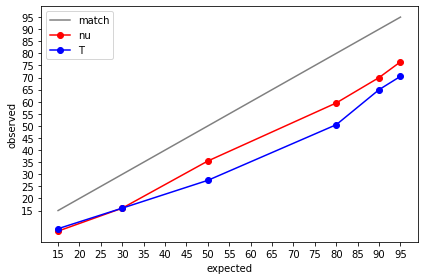

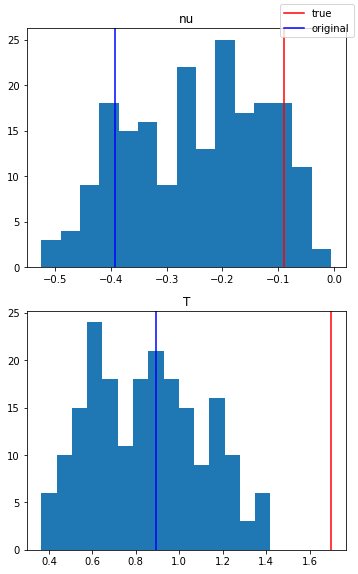

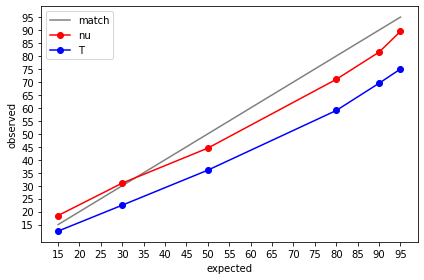

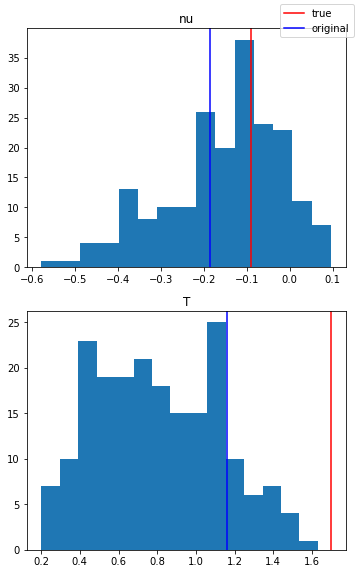

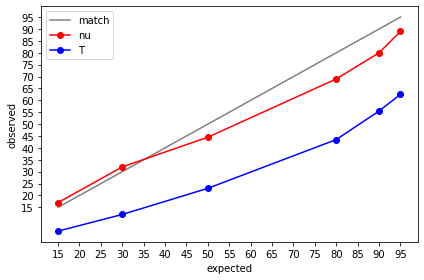

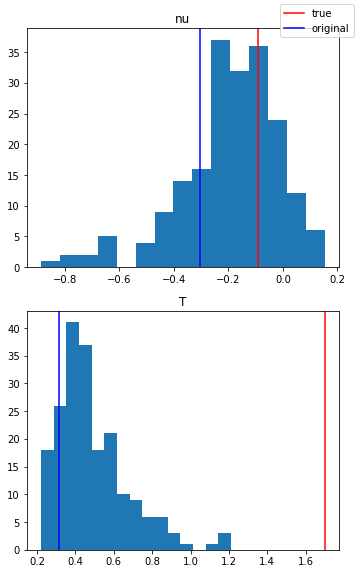

In [15]:
# RFR_1 plots
params = ['nu', 'T']
expected = [95, 90, 80, 50, 30, 15]
for bootstrap_pred in bstr_rfr_1:
    plotting.plot_coverage(bootstrap_pred, params, expected)
    plotting.plot_distribution(bootstrap_pred, params, 125)

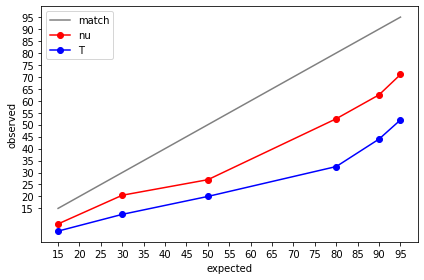

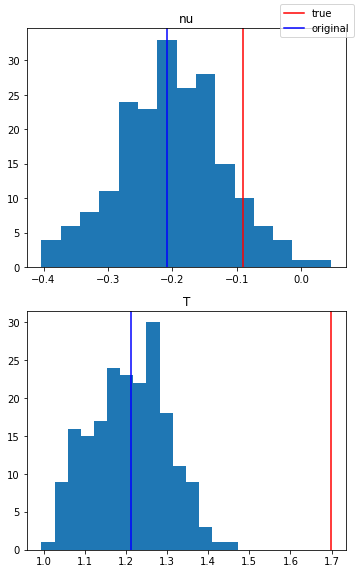

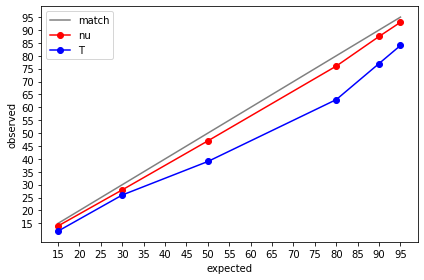

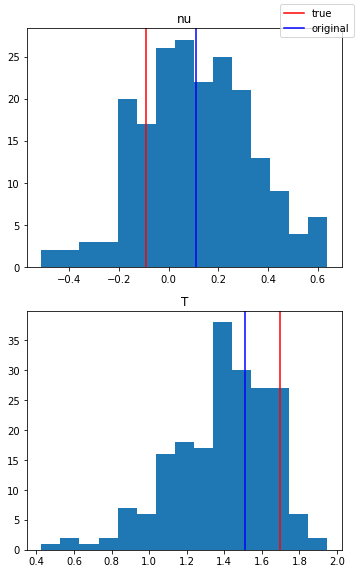

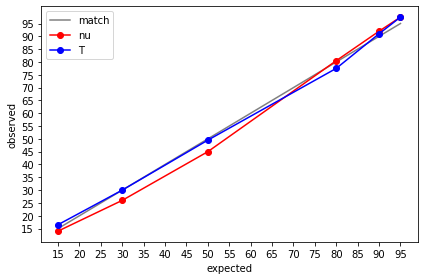

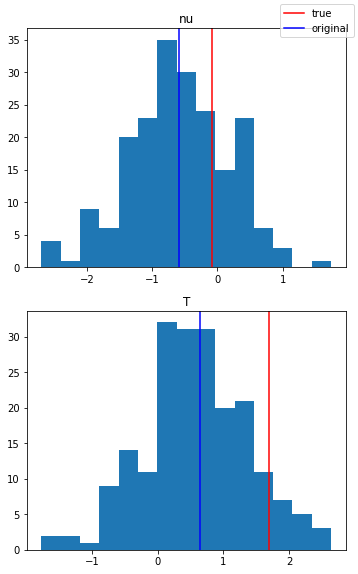

In [23]:
# MLPR_1 plots
params = ['nu', 'T']
expected = [95, 90, 80, 50, 30, 15]
for bootstrap_pred in bstr_mlpr_1:
    plotting.plot_coverage(bootstrap_pred, params, expected)
    plotting.plot_distribution(bootstrap_pred, params, 125)

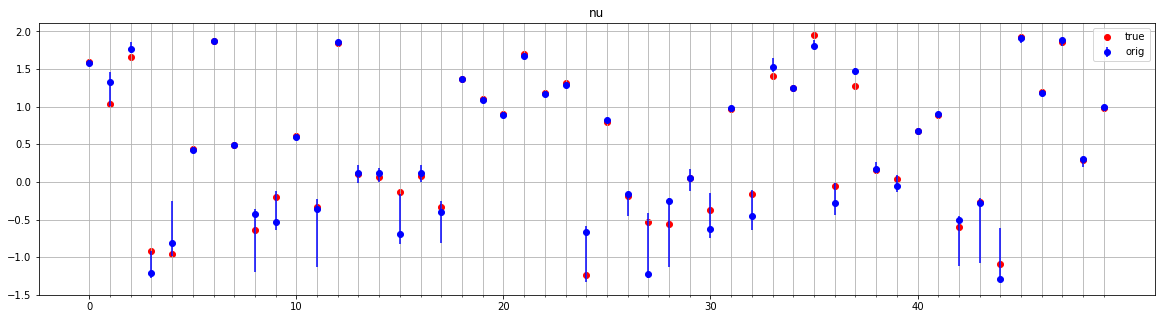

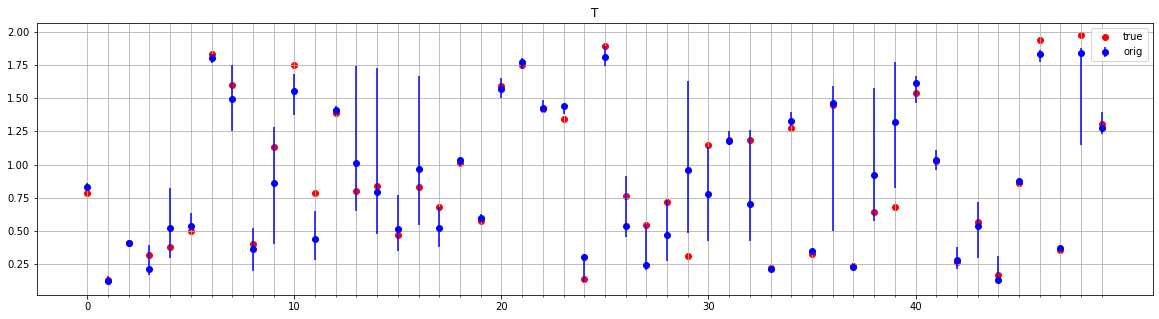

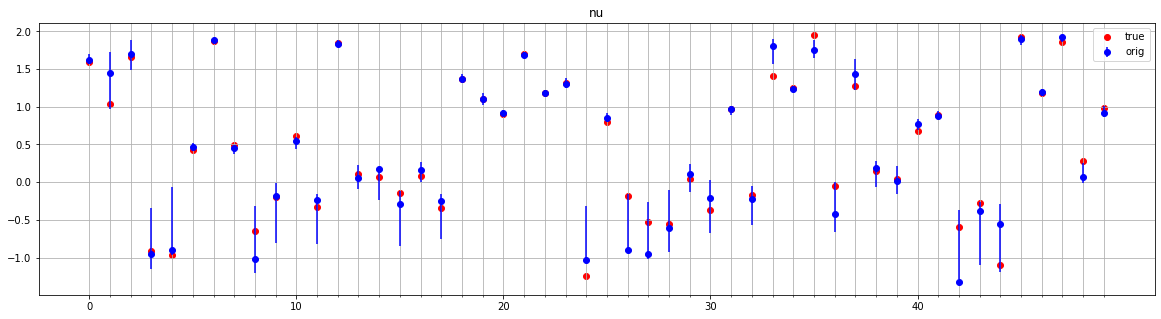

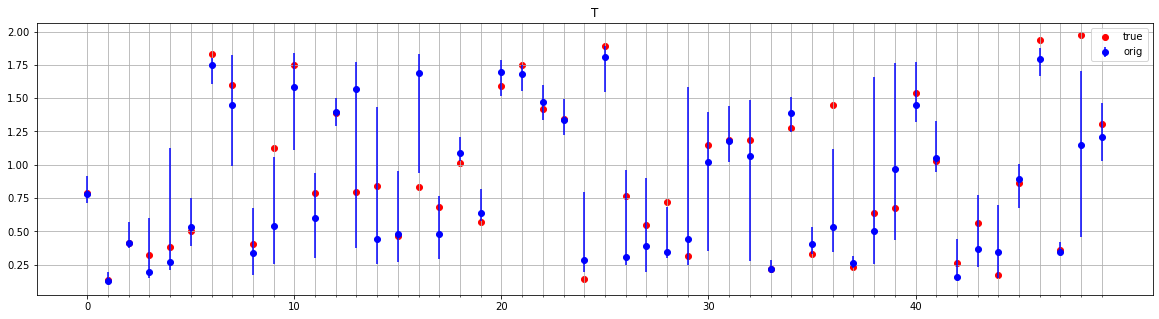

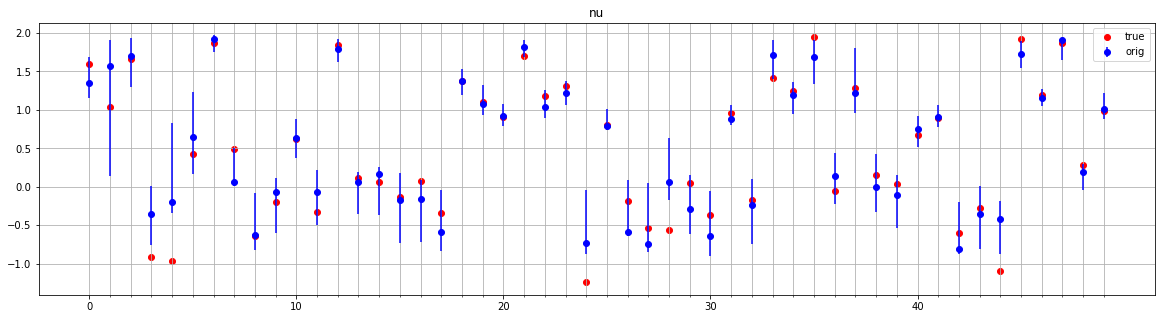

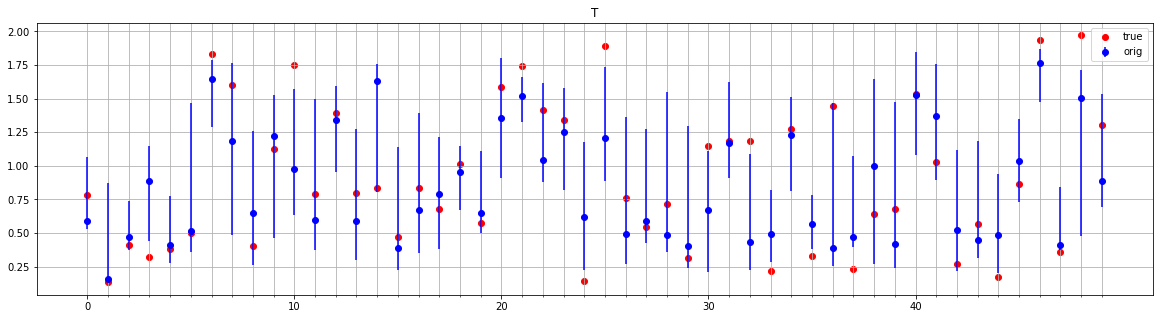

In [19]:
# RFR_1 intervals plots for all three thetas [10000, 1000, 100]
params = ['nu', 'T']
for bootstrap_pred in bstr_rfr_1:
    intervals = data_manip.bootstrap_intervals(bootstrap_pred, params)
    plotting.plot_intervals(intervals, params, size=50)

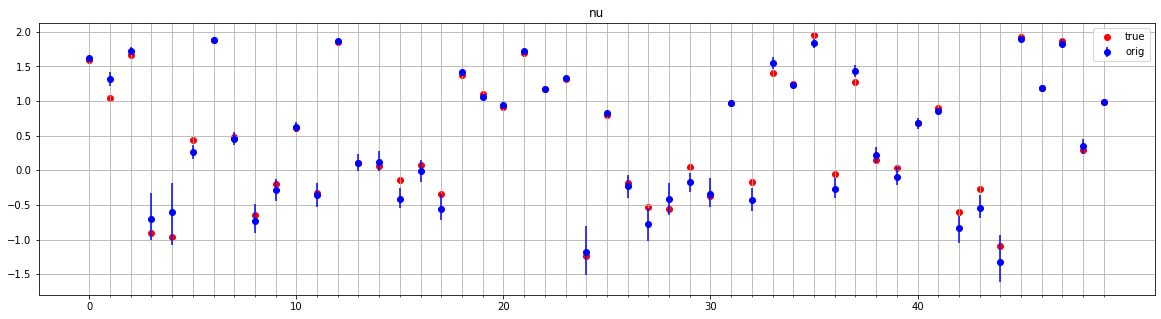

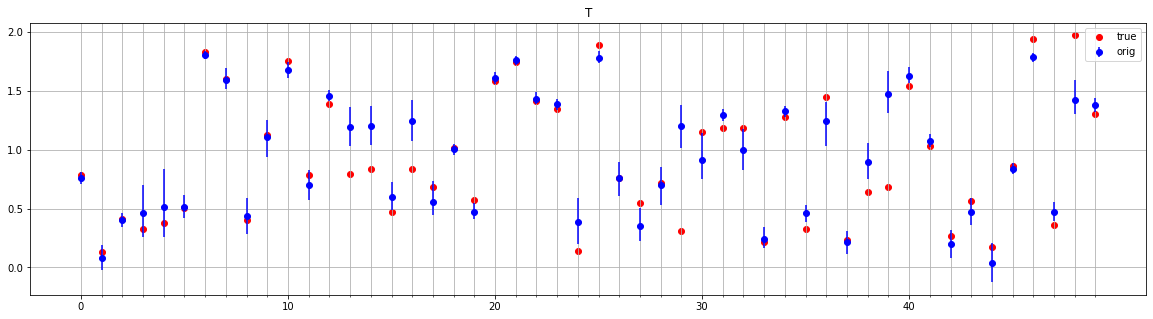

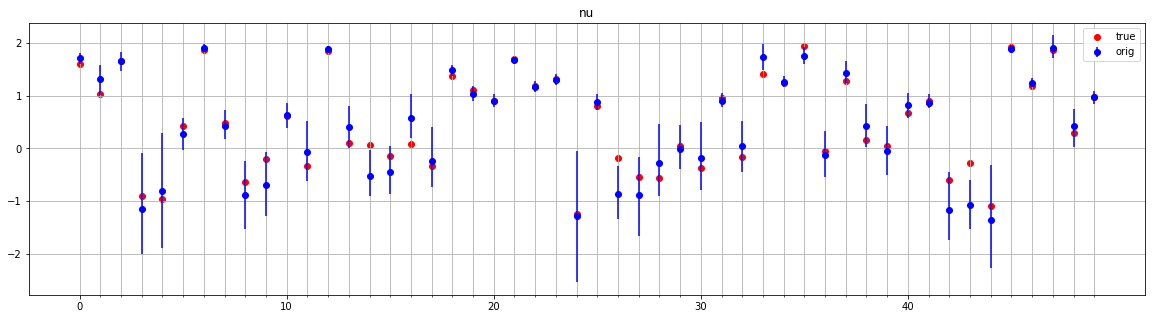

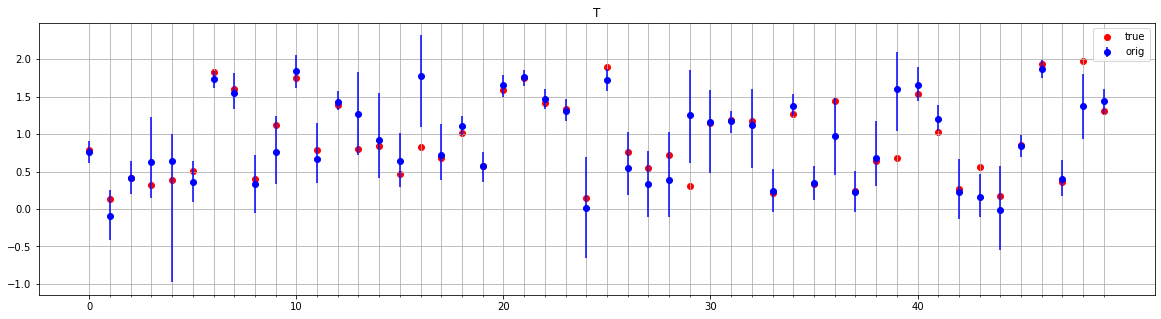

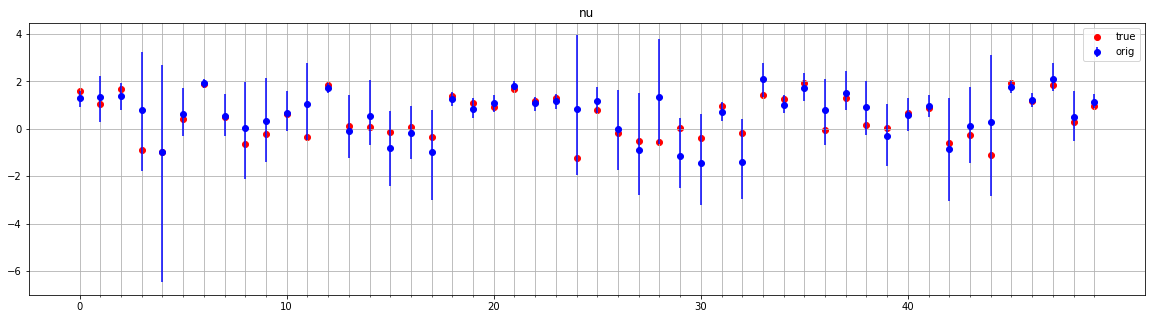

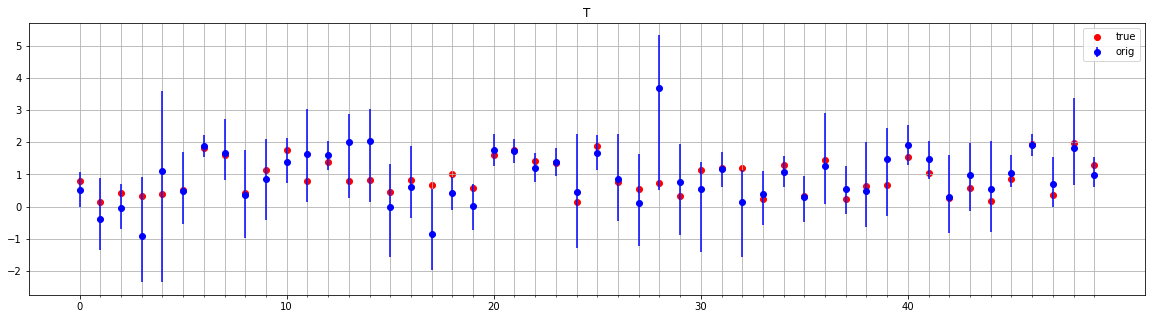

In [24]:
# MLPR_1 intervals plots for all three thetas [10000, 1000, 100]
params = ['nu', 'T']
for bootstrap_pred in bstr_mlpr_1:
    intervals = data_manip.bootstrap_intervals(bootstrap_pred, params)
    plotting.plot_intervals(intervals, params, size=50)